# DocVQA Bounding Box Preview
Visualize native DocVQA (pixparse/docvqa-wds) OCR boxes; optionally compare with VLM boxes if you run the second cell.

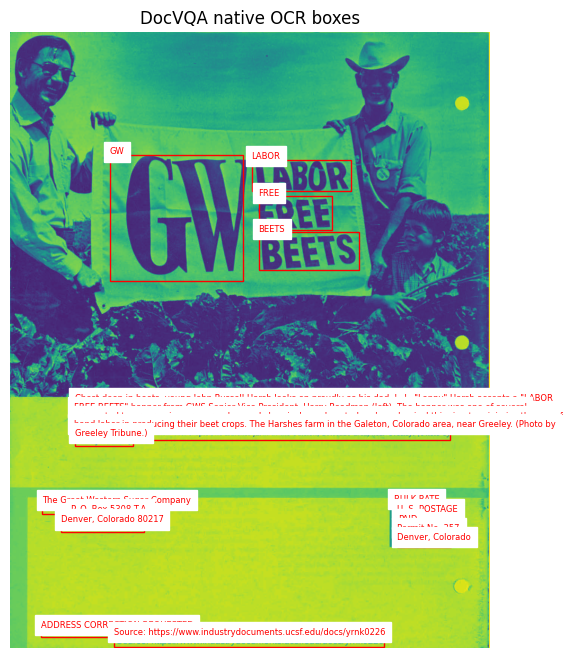

In [5]:
from datasets import load_dataset
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def get_docvqa_sample(idx: int = 0):
    ds = load_dataset('pixparse/docvqa-wds', split='train[:5]')
    sample = ds[idx]
    image = sample.get('png') or sample.get('image')
    lines = sample.get('json', {}).get('ocr_results', {}).get('recognitionResults', [])[0].get('lines', [])
    return image, lines

def plot_boxes(image, boxes, title: str):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(image)
    for item in boxes:
        bb = item.get('boundingBox') or item.get('bbox') or []
        if len(bb) == 8:
            xs, ys = bb[0::2], bb[1::2]
            x1, x2 = min(xs), max(xs)
            y1, y2 = min(ys), max(ys)
        elif len(bb) == 4:
            x1, y1, x2, y2 = bb
        else:
            continue
        rect = Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=1, edgecolor='red', facecolor='none')
        ax.add_patch(rect)
        text = item.get('text', '')
        if text:
            ax.text(x1, y1 - 4, text, color='red', fontsize=6, backgroundcolor='white')
    ax.axis('off')
    ax.set_title(title)
    plt.show()

image, lines = get_docvqa_sample(0)
plot_boxes(image, lines, title='DocVQA native OCR boxes')


Using VLM model: gpt-4o


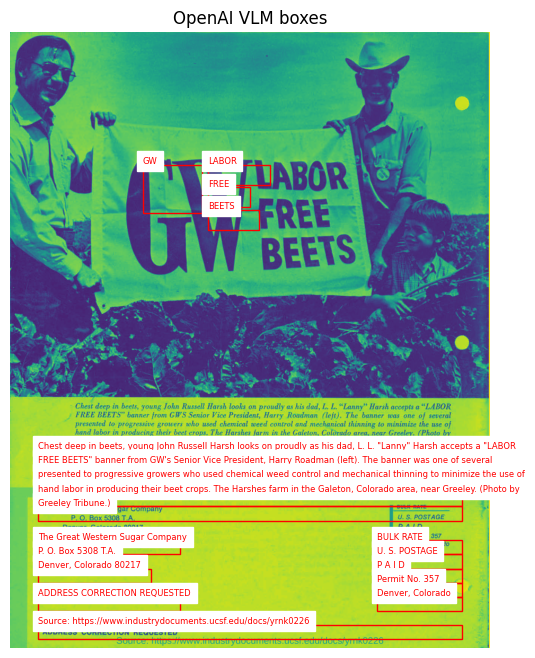

In [7]:
# Optional: compare with OpenAI VLM boxes (requires OPENAI_API_KEY).
from ocr_eval.engines.openai import OpenAIVLMEngine
from PIL import Image
from pathlib import Path

tmp_path = Path('docvqa_sample.png')
image.save(tmp_path)
engine = OpenAIVLMEngine()
print(f'Using VLM model: {engine.model}')
vlm_boxes = engine.extract_text_with_boxes(str(tmp_path))
plot_boxes(image, vlm_boxes, title='OpenAI VLM boxes')
tmp_path.unlink(missing_ok=True)
